<a href="https://colab.research.google.com/github/Pantercode/Popula-oCarcerariaMG/blob/main/Pop_Carc_Mg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise da População Carcerária em Minas Gerais

In [ ]:
#importando Libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
#leitura do dataset
df_pop = pd.read_csv('populacao-carceraria.csv',sep=';')
df_pop

FileNotFoundError: ignored

In [ ]:
#análise da tipagem dos dados
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     2853 non-null   int64 
 1   estabelecimento_prisional  2853 non-null   object
 2   sexo                       2853 non-null   object
 3   faixa_etaria_01_jan        2853 non-null   object
 4   ano_registro               2853 non-null   int64 
 5   mes_numerico_01            2853 non-null   int64 
 6   mes_registro_01            2853 non-null   object
 7   qtde                       2655 non-null   object
dtypes: int64(3), object(5)
memory usage: 178.4+ KB


In [ ]:
#contabilizando dados nulos no arquivo
df_pop.isnull().sum()

codigo                         0
estabelecimento_prisional      0
sexo                           0
faixa_etaria_01_jan            0
ano_registro                   0
mes_numerico_01                0
mes_registro_01                0
qtde                         198
dtype: int64

In [ ]:
# função que trata os valores null ou NAN
def tratar_none_coluna(df, coluna, valor_substituto):
    df[coluna] = df[coluna].fillna(valor_substituto)
    return df

In [ ]:
tratar_none_coluna(df_pop,'qtde','0')

,codigo,estabelecimento_prisional,sexo,faixa_etaria_01_jan,ano_registro,mes_numerico_01,mes_registro_01,qtde
0,1,Apac Campo Belo I,Feminino,Faixa Etária 30 a 34 anos,2022,1,jan,"1,0"
1,1,Apac Campo Belo I,Masculino,Faixa Etária 20 a 24 anos,2022,1,jan,"18,0"
2,1,Apac Campo Belo I,Masculino,Faixa Etária 25 a 29 anos,2022,1,jan,"29,0"
3,1,Apac Campo Belo I,Masculino,Faixa Etária 30 a 34 anos,2022,1,jan,"13,0"
4,1,Apac Campo Belo I,Masculino,Faixa Etária 35 a 39 anos,2022,1,jan,"17,0"
...,...,...,...,...,...,...,...,...
2848,242,Nucleo de Gestao de Escolta Hospitalar/Dse,Masculino,Faixa Etária 45 a 49 anos,2022,1,jan,"1,0"
2849,242,Nucleo de Gestao de Escolta Hospitalar/Dse,Masculino,Faixa Etária 50 a 54 anos,2022,1,jan,"1,0"
2850,242,Nucleo de Gestao de Escolta Hospitalar/Dse,Masculino,Faixa Etária 55 a 59 anos,2022,1,jan,"3,0"
2851,242,Nucleo de Gestao de Escolta Hospitalar/Dse,Masculino,Faixa Etária 65 a 69 anos,2022,1,jan,0


In [ ]:
#contabilizando dados nulos na coluna qtde
df_pop.qtde.isnull().sum()

0

In [ ]:
#função que renomeia a colunas
def rename_column(df, old_column_name, new_column_name):
    df.rename(columns={old_column_name: new_column_name}, inplace=True)

In [ ]:
#Renomeado as colunas segundo o uso
rename_column(df_pop,'estabelecimento_prisional','Penitenciaria')
rename_column(df_pop,'faixa_etaria_01_jan','Faixa_Etaria')
rename_column(df_pop,'ano_registro','Ano')
rename_column(df_pop,'mes_registro_01','Mes')
rename_column(df_pop,'mes_numerico_01','Mes_Num')
rename_column(df_pop,'qtde','Detentos')

In [ ]:
df_pop.head()

In [ ]:
#função que muda os tipos dos dados nas colunas

def alterar_tipo_dado(dataframe, coluna, novo_tipo):

    try:
        if novo_tipo == 'float':
            # Substituir vírgulas por pontos e converter para float
            dataframe[coluna] = dataframe[coluna].str.replace(',', '.').astype(float)
        elif novo_tipo == 'int':
            # Substituir vírgulas por pontos, converter para float e depois para int
            dataframe[coluna] = dataframe[coluna].str.replace(',', '.').astype(float).astype(int)
        elif novo_tipo == 'bool':
            dataframe[coluna] = dataframe[coluna].astype(bool)
        else:
            # Para outros tipos, tentar conversão direta
            dataframe[coluna] = dataframe[coluna].astype(novo_tipo)
    except Exception as e:
        print(f"Erro ao alterar o tipo de dado: {e}")



In [ ]:
#Alterando a tipagem do dados da coluna Detentos
alterar_tipo_dado(df_pop,'Detentos','int')

In [ ]:
#df_pop.head(1)

# Comparação por Sexo

In [ ]:
#Contabilizando as linha da coluna sexo
Comp_Sexo = df_pop['sexo'].value_counts()


In [ ]:
# Mapeamento de cores
colors = ['blue' if sexo == 'Masculino' else 'pink' for sexo in Comp_Sexo.index]

# Criando o gráfico
trace = go.Bar(x=Comp_Sexo.index, y=Comp_Sexo.values, marker_color=colors)
layout = go.Layout(title='Comparação por Sexo',
                   xaxis=dict(title='Sexo'),
                   yaxis=dict(title='Quantidade'))

fig = go.Figure(data=[trace], layout=layout)

# Mostrando o gráfico
fig.show()


In [ ]:
#Agrupando as colunas de e contabilizando os dados
df_faixa = df_pop.groupby(['Faixa_Etaria', 'sexo']).size().reset_index(name='count')


fig = px.bar(df_faixa, x="Faixa_Etaria", y="count", color="sexo", text_auto=True, title="Faixa Etaria por Sexo")
fig.show()


NameError: ignored

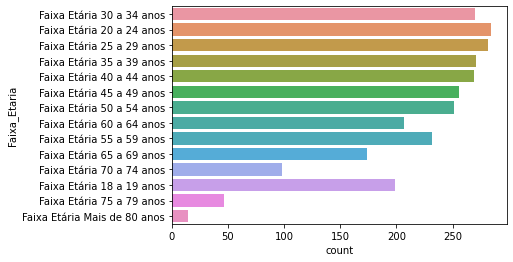

In [ ]:
#Analise Detentos por Faixa Etaria
sns.countplot(y='Faixa_Etaria',data=df_pop,);

In [ ]:
#Percentual de Detentos por Sexo
grafp = px.pie(df_pop,'sexo')
grafp.update_layout(title_text='Percentual de Presos por Sexo')
grafp.show()

# Analisando as anormalidades em Detentos

In [ ]:
df_pop.Detentos.describe()

count    2853.000000
mean       22.938311
std        51.909935
min         0.000000
25%         2.000000
50%         6.000000
75%        21.000000
max       750.000000
Name: Detentos, dtype: float64

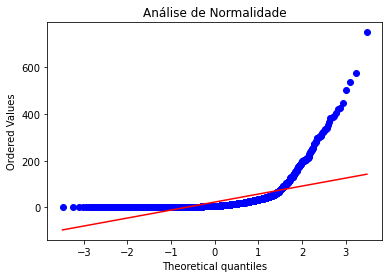

In [ ]:
#analise de anormalidade
stats.probplot(df_pop['Detentos'],dist='norm',plot=plt)
plt.title('Análise de Normalidade')
plt.show()